## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
Nmice = len(pd.unique(df['Mouse ID']))
Drug = len(pd.unique(df['Drug Regimen']))
summary = pd.DataFrame({'Number of Mice':[Nmice], 'Number of Drug Regimens':[Drug]})
summary

,Number of Mice,Number of Drug Regimens
0,249,10


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_id = df.loc[df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
dup_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df["Mouse ID"] == 'g989'

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1893, dtype: bool

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandf = df[df['Mouse ID'].isin(dup_id)==False]
unique = cleandf["Mouse ID"].nunique()
clean_mouse = cleandf
clean_mouse.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
unique

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summ = pd.DataFrame(df.groupby('Drug Regimen').count())
summ['Mean'] = df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
summ['Median'] = df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
summ['SEM'] = (df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)'])
summ['Variance'] = df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.
summ = summ[['Mouse ID','Mean','Median','SEM','Variance']]
summ['Mean'] = summ['Mean'].map('{:,.2f}'.format)
summ['Median'] = summ['Median'].map('{:,.2f}'.format)
summ['SEM'] = summ['SEM'].map('{:,.3f}'.format)
summ['Variance'] = summ['Variance'].map('{:,.2f}'.format)
summ = summ.rename_axis('Drug Regimen', axis='columns')
summ = summ.rename_axis(' ', axis='rows')
summ


Drug Regimen,Mouse ID,Mean,Median,SEM,Variance
,,,,,
Capomulin,230,40.68,41.56,0.329,24.95
Ceftamin,178,52.59,51.78,0.470,39.29
Infubinol,178,52.88,51.82,0.492,43.13
Ketapril,188,55.24,53.70,0.604,68.55
Naftisol,186,54.33,52.51,0.596,66.17
Placebo,181,54.03,52.29,0.581,61.17
Propriva,161,52.32,50.85,0.513,42.35
Ramicane,228,40.22,40.67,0.321,23.49
Stelasyn,181,54.23,52.43,0.573,59.45


In [8]:
df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
x = df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
x

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

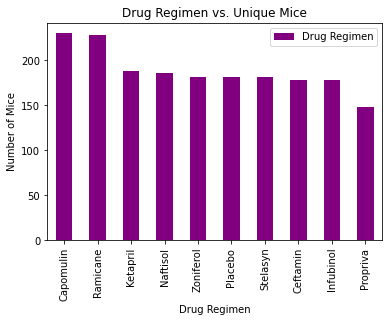

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
bar = cleandf["Drug Regimen"].value_counts()
bar.plot(kind="bar", facecolor="purple", legend=True)
plt.title("Drug Regimen vs. Unique Mice")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")

([<matplotlib.axis.XTick at 0x2be3a0cdd60>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

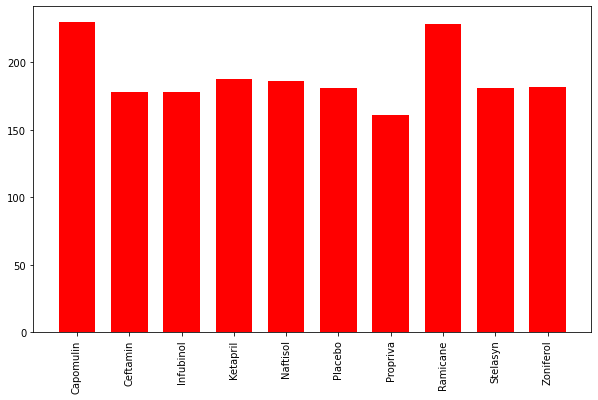

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
datapoints = summ[["Mouse ID"]]
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,6))
plt.bar(x_axis, datapoints["Mouse ID"], color="r", width = .7)
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")



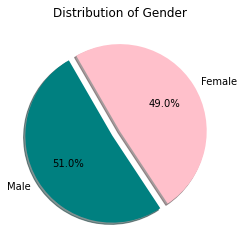

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = cleandf["Sex"].value_counts()
labels = ['Male', 'Female']
colors = ['teal', 'pink']

plt.pie(gender, explode = (0.1, 0), labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow = True, startangle = 120)
plt.title("Distribution of Gender")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
ceftamin = cleandf.loc[cleandf['Drug Regimen']== 'Ceftamin', :]
infubinol = cleandf.loc[cleandf['Drug Regimen']== 'Infubinol', :]
ramicane = cleandf.loc[cleandf['Drug Regimen']== 'Ramicane', : ]
capomulin = cleandf.loc[cleandf['Drug Regimen']== 'Capomulin', :]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ceftamin_M = ceftamin.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_M)
infubinol_M = infubinol.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_M)
ramicane_M = ramicane.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_M)
capomulin_M = capomulin.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_M)

# Merge ceftamin
ceftamin_merge = pd.merge(ceftamin_vol, cleandf, on=("Mouse ID", "Timepoint"),how="left")
# Find tumor volume and test merge
tceftamin = ceftamin_merge["Tumor Volume (mm3)"]
ceftamin_merge.head()

# Ceftamin Stats
quartiles = tceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"Ceftamin Statistics:")
print(f"The upper quartile tumor volume is: {upperq}.")
print(f"The lower quartile tumor volume is: {lowerq}.")
print(f"The interquartile range tumor volme is: {iqr}.")
print(f"The median tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

Ceftamin Statistics:
The upper quartile tumor volume is: 64.29983003.
The lower quartile tumor volume is: 48.72207785.
The interquartile range tumor volme is: 15.577752179999997.
The median tumor volume is: 59.85195552.
Values above 87.66645829999999 could be outliers.
Values below 25.355449580000002 could be outliers.


In [14]:
# Merge and test infubinol
infubinol_merge = pd.merge(infubinol_vol, cleandf, on=("Mouse ID", "Timepoint"),how="left")
# Find tumor volume and test merge
tinfubinol = infubinol_merge["Tumor Volume (mm3)"]
infubinol_merge.head()

# Infubinol Stats
quartiles = tinfubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"Infubinol Statistics:")
print(f"The upper quartile tumor volume is: {upperq}.")
print(f"The lower quartile tumor volume is: {lowerq}.")
print(f"The interquartile range tumor volme is: {iqr}.")
print(f"The median tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

Infubinol Statistics:
The upper quartile tumor volume is: 65.52574285.
The lower quartile tumor volume is: 54.04860769.
The interquartile range tumor volme is: 11.477135160000003.
The median tumor volume is: 60.16518046.
Values above 82.74144559000001 could be outliers.
Values below 36.83290494999999 could be outliers.


In [15]:
# Merge and test ramicane
ramicane_merge = pd.merge(ramicane_vol, cleandf, on=("Mouse ID", "Timepoint"),how="left")
# Find tumor volume and test merge
tramicane = ramicane_merge["Tumor Volume (mm3)"]
ramicane_merge.head()
# Ramicane Stats
quartiles = tramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"Ramicane Statistics:")
print(f"The upper quartile tumor volume is: {upperq}.")
print(f"The lower quartile tumor volume is: {lowerq}.")
print(f"The interquartile range tumor volme is: {iqr}.")
print(f"The median tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")


Ramicane Statistics:
The upper quartile tumor volume is: 40.65900627.
The lower quartile tumor volume is: 31.56046955.
The interquartile range tumor volme is: 9.098536719999998.
The median tumor volume is: 36.56165229.
Values above 54.30681135 could be outliers.
Values below 17.912664470000003 could be outliers.


In [16]:
# Merge and test capomulin
capomulin_merge = pd.merge(capomulin_vol, cleandf, on=("Mouse ID", "Timepoint"),how="left")
# Find tumor volume and test merge
tcapomulin = capomulin_merge["Tumor Volume (mm3)"]
capomulin_merge.head()
# Capomulin Stats
quartiles = tcapomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"Capomulin Statistics:")
print(f"The upper quartile tumor volume is: {upperq}.")
print(f"The lower quartile tumor volume is: {lowerq}.")
print(f"The interquartile range tumor volme is: {iqr}.")
print(f"The median tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

Capomulin Statistics:
The upper quartile tumor volume is: 40.1592203.
The lower quartile tumor volume is: 32.37735684.
The interquartile range tumor volme is: 7.781863460000004.
The median tumor volume is: 38.1251644.
Values above 51.83201549 could be outliers.
Values below 20.70456164999999 could be outliers.


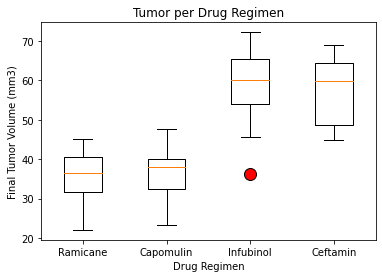

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Variables = [tramicane, tcapomulin, tinfubinol, tceftamin]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor per Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

outlier_dot = dict(markerfacecolor='red',markersize=12)
# Create Boxplot
ax1.boxplot(Variables, labels=["Ramicane","Capomulin","Infubinol","Ceftamin",],flierprops=outlier_dot)

plt.savefig('boxplot')
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

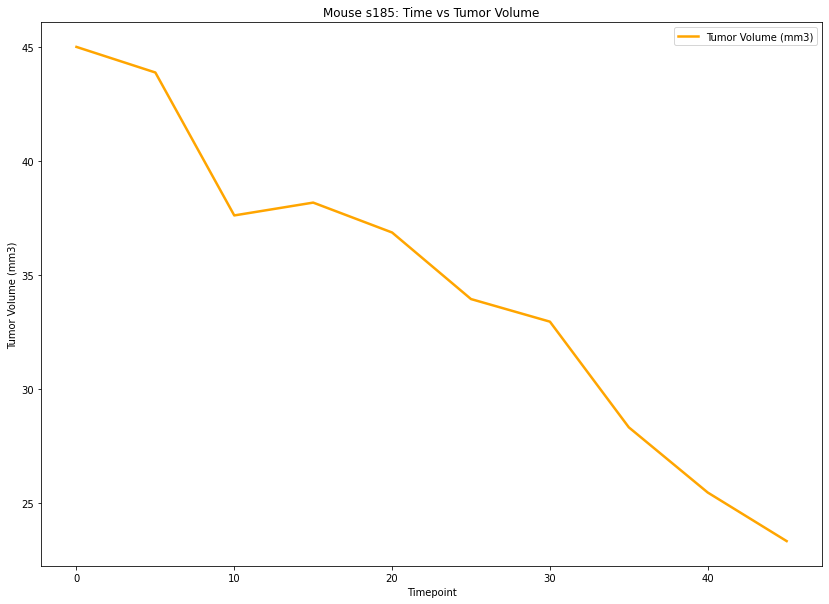

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = cleandf.loc[cleandf['Drug Regimen']== 'Capomulin', :]
capomulin = capomulin.reset_index()
# capomulin.head()
# isolate mouse k403
capomulins185 = capomulin.loc[capomulin["Mouse ID"] == "s185"]
capomulins185.head(7)
capomulins185 = capomulins185.loc[:,["Timepoint", "Tumor Volume (mm3)"]]
capomulins185 = capomulins185.reset_index(drop=True)
# Create line graph
capomulins185.set_index('Timepoint').plot(figsize=(14,10), color='orange', linewidth=2.5)
plt.title("Mouse s185: Time vs Tumor Volume")
plt.ylabel('Tumor Volume (mm3)')



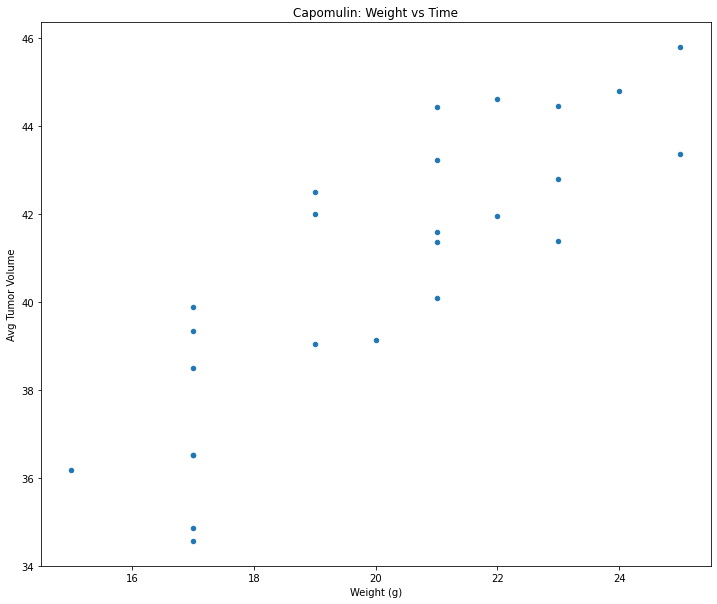

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulinW = capomulin.loc[:,["Weight (g)", "Mouse ID", "Tumor Volume (mm3)"]]
# capomulinW.head()
# Find average  Tumor volume 
capomulinM = pd.DataFrame(capomulinW.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
# rename columns to reflect change
capomulinM = capomulinM.rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume"})
# capomulinM.head()
# generate scatter plot
capomulinM = capomulinM.set_index("Mouse ID")

capomulinM.plot(kind = "scatter", x="Weight (g)", y="Avg Tumor Volume", figsize=(12,10),
                    title="Capomulin: Weight vs Time")
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84.


Text(0, 0.5, 'Avg Tumor Volume')

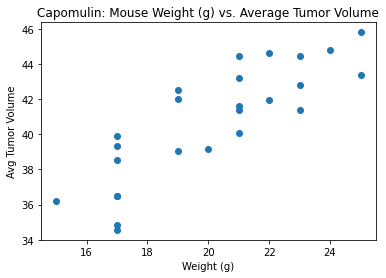

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = capomulinM.iloc[:,0]
avg_tumor_volume = capomulinM.iloc[:,1]
# find correlation coefficient
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}.")
# linear regression setup: graph
yvalue = capomulinM['Avg Tumor Volume']
xvalue = capomulinM['Weight (g)']
plt.scatter(xvalue,yvalue)
plt.title("Capomulin: Mouse Weight (g) vs. Average Tumor Volume")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume')

Projected y is 42.54983369121531 vs the real value of 41.963635634
r-squared: 0.7088568047708717


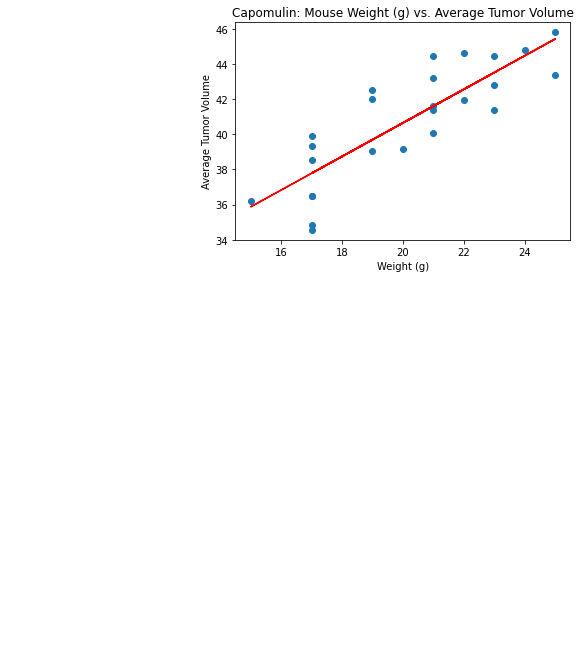

In [23]:
# linear regression setup: model y=mx+b
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
y=slope*xvalue[0]+intercept
print(f"Projected y is {y} vs the real value of {yvalue[0]}")

regression = slope*xvalue + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalue,yvalue)
plt.plot(xvalue,regression,"r-")
plt.annotate(line_eq,(7,10),fontsize=15,color="purple")
plt.title("Capomulin: Mouse Weight (g) vs. Average Tumor Volume")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
print(f"r-squared: {rvalue**2}")
plt.show()
